IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Import libraries for modelling process
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

IMPORTING AND PREPARING DATASET

In [10]:
# load the customer datasets
customer = pd.read_csv('dataset/customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
# load the order items datasets
order_items = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
# load the order payments datasets
order_payments = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
# load the order review datasets
order_reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
# load the orders datasets
orders = pd.read_csv('dataset/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
# load the products datasets
products = pd.read_csv('dataset/olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
# load the sellers datasets
sellers = pd.read_csv('dataset/olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [17]:
# load the product translation datasets
product_translation = pd.read_csv('dataset/product_category_name_translation.csv')
product_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [18]:
#Merging all customer related datasets
A = pd.merge(orders,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,customer,on='customer_id')
A.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [19]:
#Merging all seller related datasets
B = pd.merge(order_items,products,on='product_id')
B = pd.merge(B,sellers,on='seller_id')
B = pd.merge(B,product_translation,on='product_category_name')
B.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


In [20]:
#Merging customer and seller datasets
df_ecommerce = pd.merge(A,B, on = 'order_id')
df_ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


In [21]:
#Choosing only the important column
df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
                              'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
                              'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
                              'product_photos_qty','review_score']]

#Fixing typos and column names
df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [22]:
df_ecommerce.shape

(115609, 16)

Data cleaning & preprocessing

In [23]:
#Detecting every NaN value on every columns
df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category                    0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [24]:
#Removing data with NaN value
prev_size = df_ecommerce.shape[0]
df_ecommerce.dropna(how='any',inplace=True)
current_size = df_ecommerce.shape[0]

df_ecommerce.isnull().values.any()
print(df_ecommerce.shape)
print('From the data cleaning, we remove {}% of NaN value data'.format(round(((prev_size - current_size)/prev_size)*100,2)))

(113209, 16)
From the data cleaning, we remove 2.08% of NaN value data


In [25]:
#Converting the timestamp format data to date data
df_ecommerce['order_purchase_timestamp'] = pd.to_datetime(df_ecommerce['order_purchase_timestamp']).dt.date
df_ecommerce['order_estimated_delivery_date'] = pd.to_datetime(df_ecommerce['order_estimated_delivery_date']).dt.date
df_ecommerce['order_delivered_customer_date'] = pd.to_datetime(df_ecommerce['order_delivered_customer_date']).dt.date
df_ecommerce['shipping_limit_date'] = pd.to_datetime(df_ecommerce['shipping_limit_date']).dt.date

In [26]:
#Converting date time into string to remove the timestamp notation
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'].sub(df_ecommerce['order_purchase_timestamp'],axis=0).astype(str)
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'].sub(df_ecommerce['order_purchase_timestamp'],axis=0).astype(str)
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'].sub(df_ecommerce['order_purchase_timestamp'],axis=0).astype(str)

In [27]:
#Replacing the time stamp notation and converting type to int
df_ecommerce['delivery_days'] = df_ecommerce['delivery_days'].str.replace(" days","").astype(int)
df_ecommerce['estimated_days'] = df_ecommerce['estimated_days'].str.replace(" days","").astype(int)
df_ecommerce['shipping_days'] = df_ecommerce['shipping_days'].str.replace(" days","").astype(int)

In [28]:
df_ecommerce.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'shipping_limit_date'],axis=1,inplace=True)

In [29]:
#Result of data preprocessing
df_ecommerce.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,14,20,6
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,9,27,5


EDA

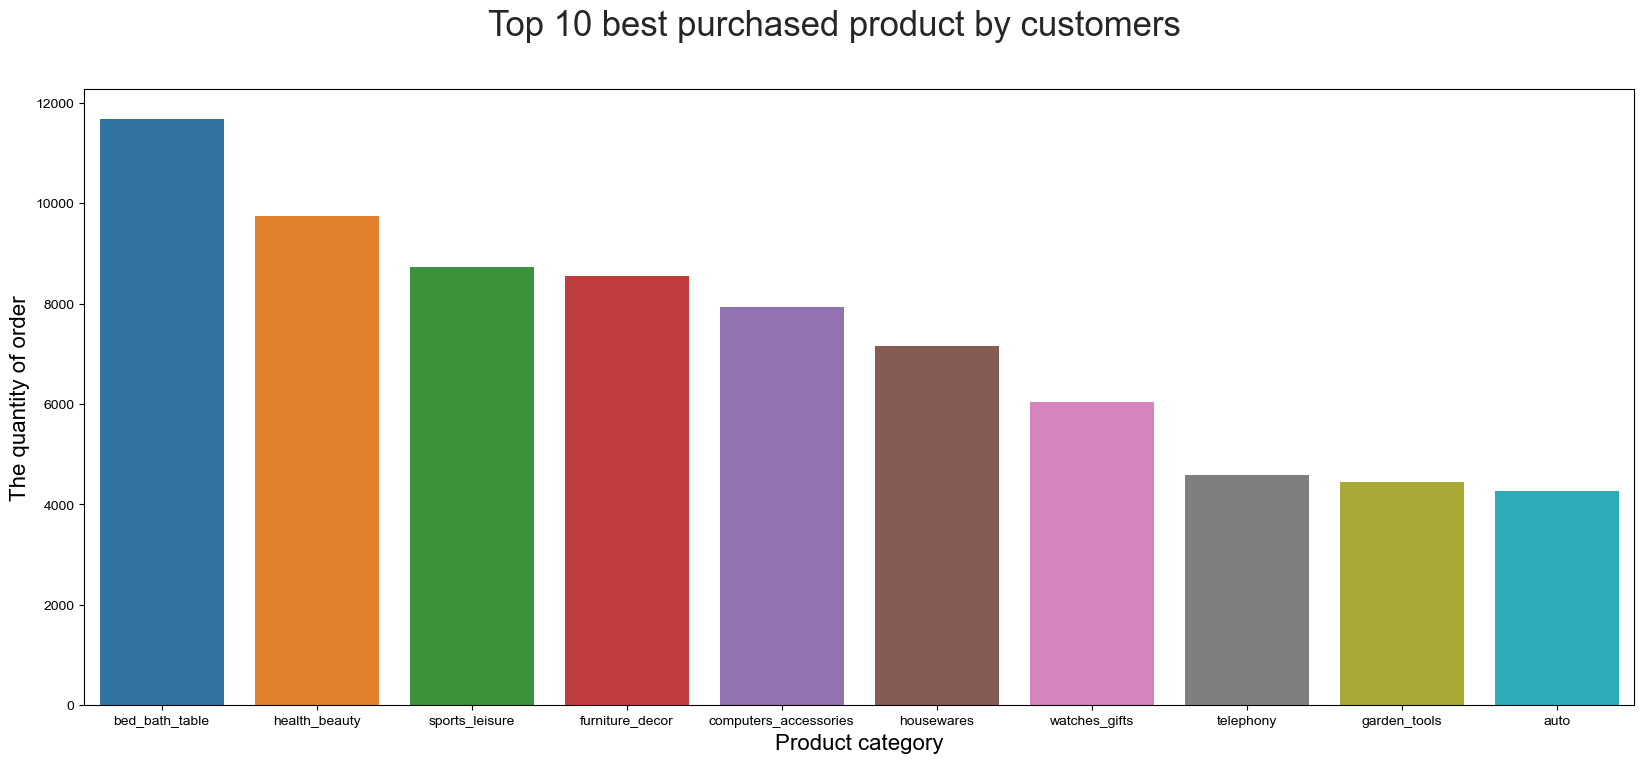

In [30]:
#Set the bar chart
fig = plt.figure(figsize = (20,8))
ax = plt.axes() 
sns.barplot(x = df_ecommerce.product_category.value_counts().index[:10], 
            y = df_ecommerce.product_category.value_counts()[:10], ax = ax)
sns.set(font_scale = 1)

#Set the label name
ax.set_xlabel('Product category', fontsize = 16)
ax.set_ylabel('The quantity of order', fontsize = 16)

#Set the Suptitle
fig.suptitle("Top 10 best purchased product by customers", fontsize = 25)

plt.show()

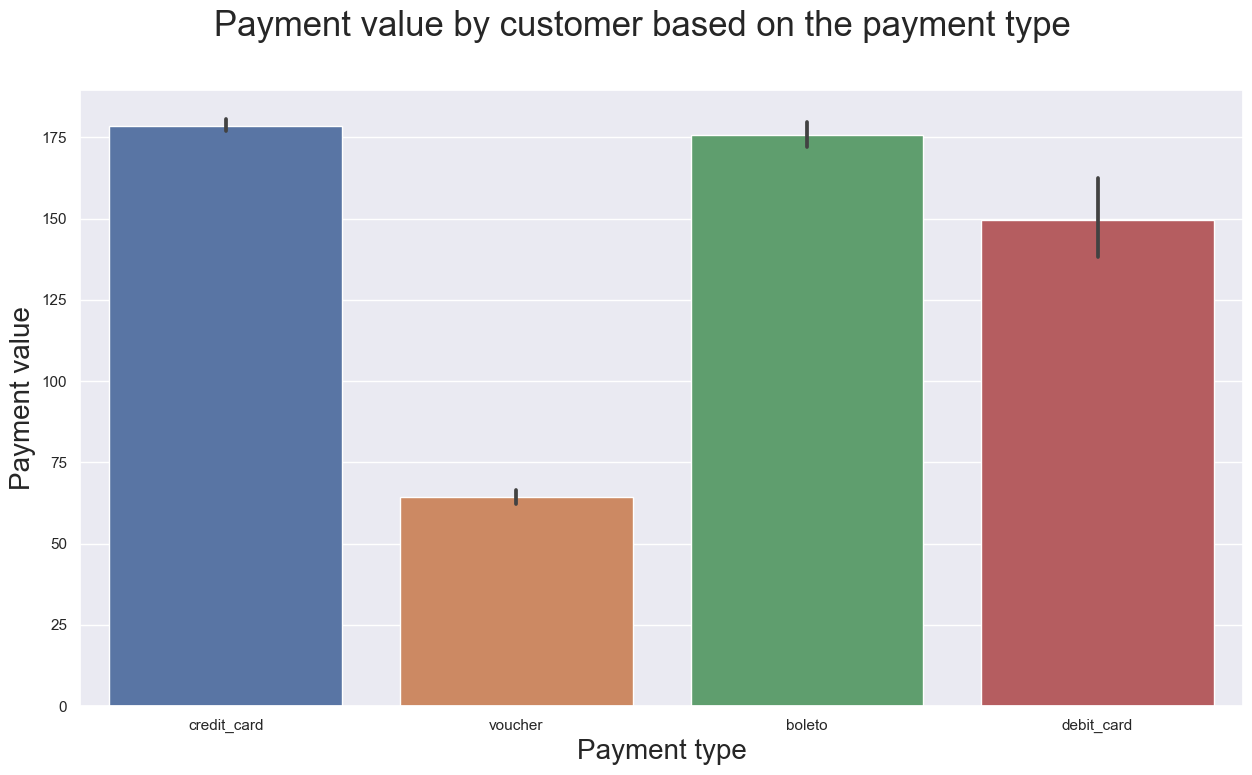

In [31]:
#Set the bar chart
fig = plt.figure(figsize = (15,8))
ax = plt.axes() 
sns.barplot(x = "payment_type", y = "payment_value",
               data = df_ecommerce, 
               ax = ax)
sns.set(font_scale = 1.75)

#Set the label name
ax.set_xlabel('Payment type', fontsize = 20)
ax.set_ylabel('Payment value', fontsize = 20)

#Set the Suptitle
fig.suptitle("Payment value by customer based on the payment type", fontsize = 25)

plt.show()

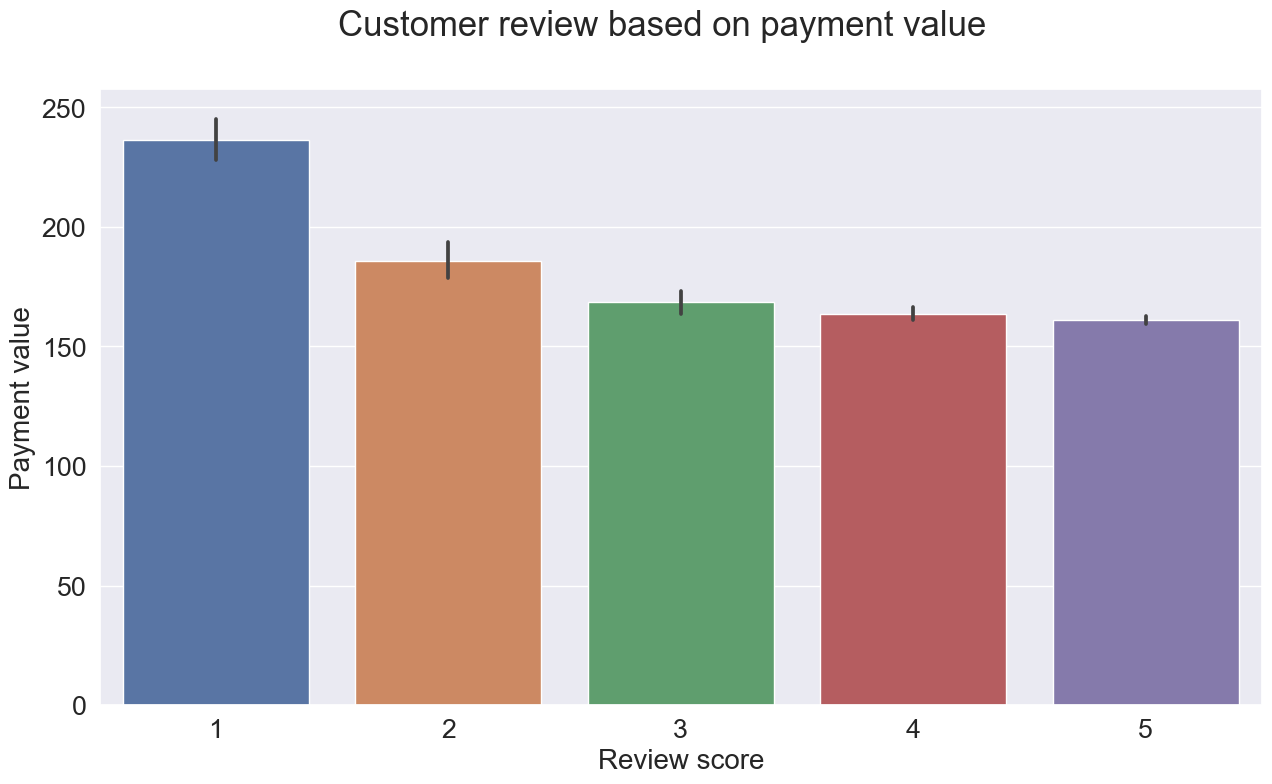

In [32]:
#Set the bar chart
fig = plt.figure(figsize = (15,8))
ax = plt.axes() 
sns.barplot(x = "review_score", y = "payment_value",
               data = df_ecommerce, 
               ax = ax)
sns.set(font_scale = 1.75)

#Set the label name
ax.set_xlabel('Review score', fontsize = 20)
ax.set_ylabel('Payment value', fontsize = 20)

#Set the Suptitle
fig.suptitle("Customer review based on payment value", fontsize = 25)

plt.show()

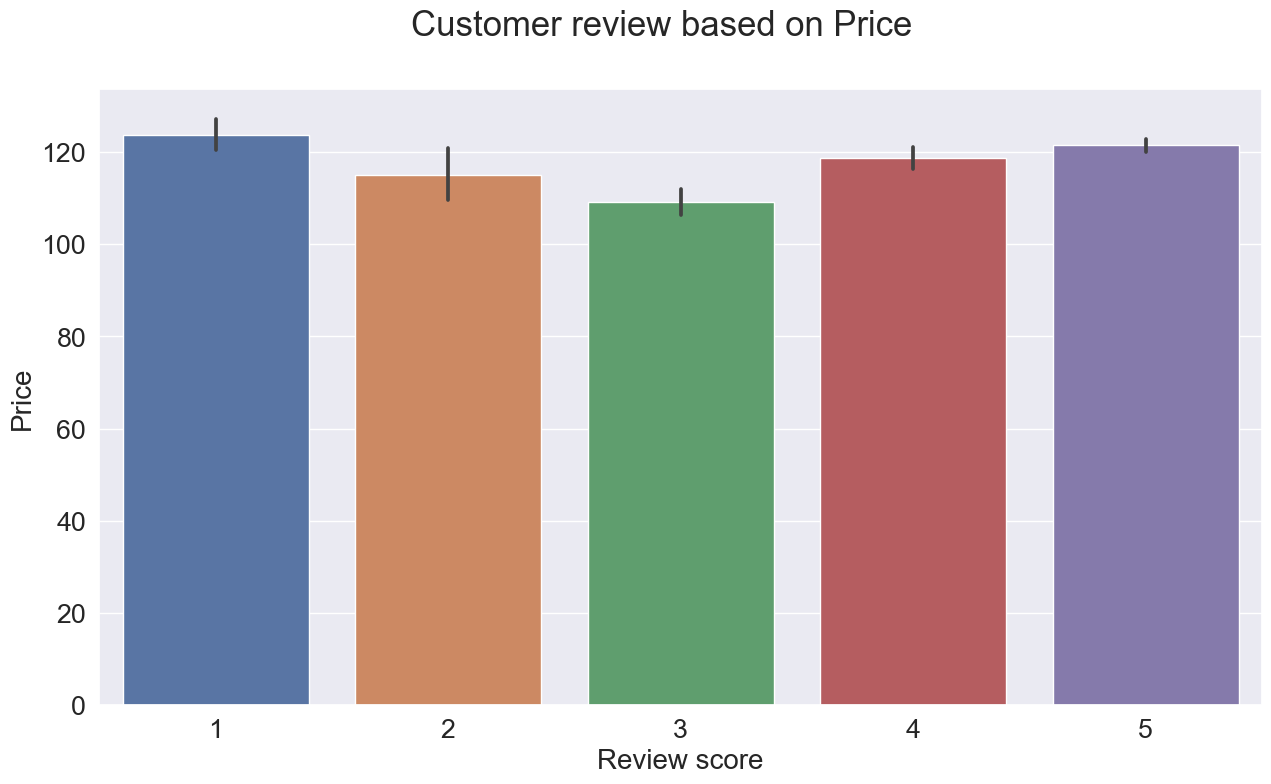

In [33]:
#Set the bar chart
fig = plt.figure(figsize = (15,8))
ax = plt.axes() 
sns.barplot(x = "review_score", y = "price",
               data = df_ecommerce, 
               ax = ax)
sns.set(font_scale = 1.75)

#Set the label name
ax.set_xlabel('Review score', fontsize = 20)
ax.set_ylabel('Price', fontsize = 20)

#Set the Suptitle
fig.suptitle("Customer review based on Price", fontsize = 25)

plt.show()

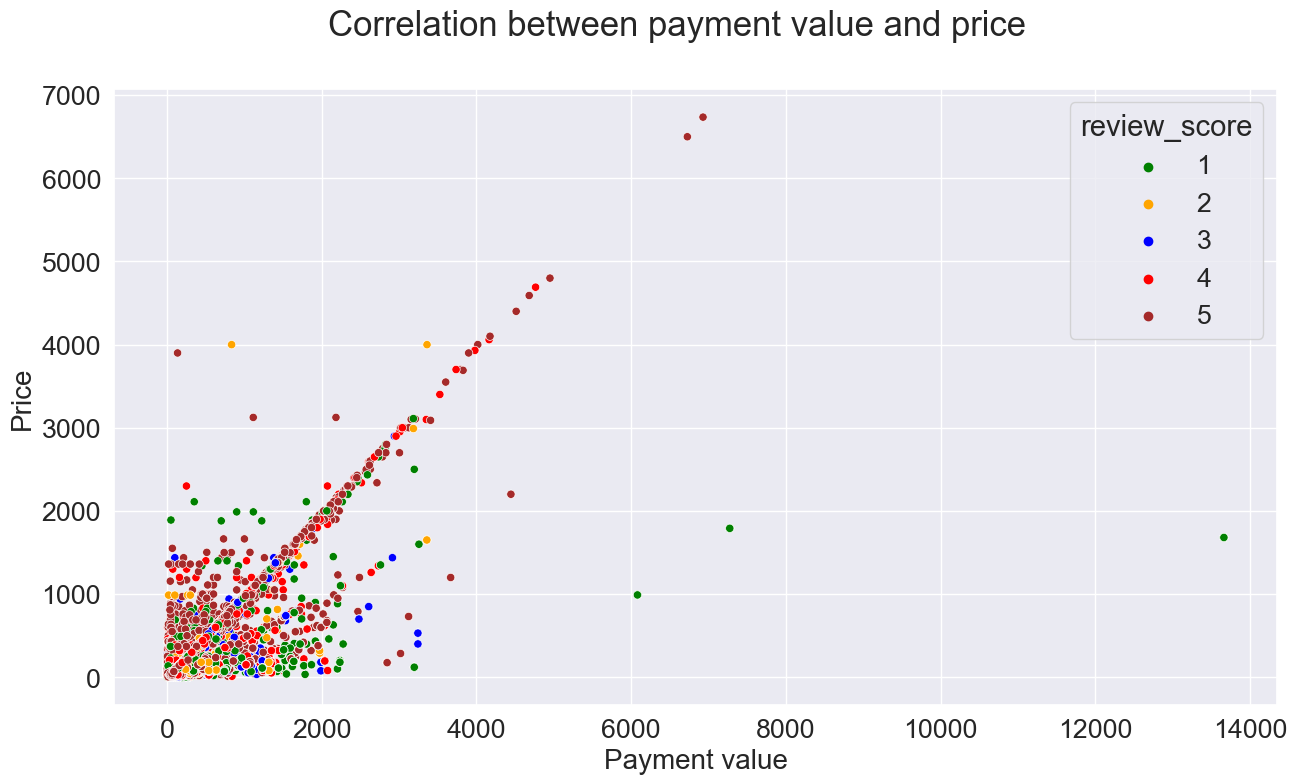

In [34]:
#Set the scatter chart
fig = plt.figure(figsize = (15,8))
ax = plt.axes() 
sns.scatterplot(x="payment_value", y="price", hue="review_score",sizes=(40, 400),
                palette = ["green","orange","blue","red","brown"],
               data = df_ecommerce, ax = ax)

#Set the label name
ax.set_xlabel('Payment value', fontsize = 20)
ax.set_ylabel('Price', fontsize = 20)

#Set the Suptitle
fig.suptitle('Correlation between payment value and price', fontsize = 25)

plt.show()

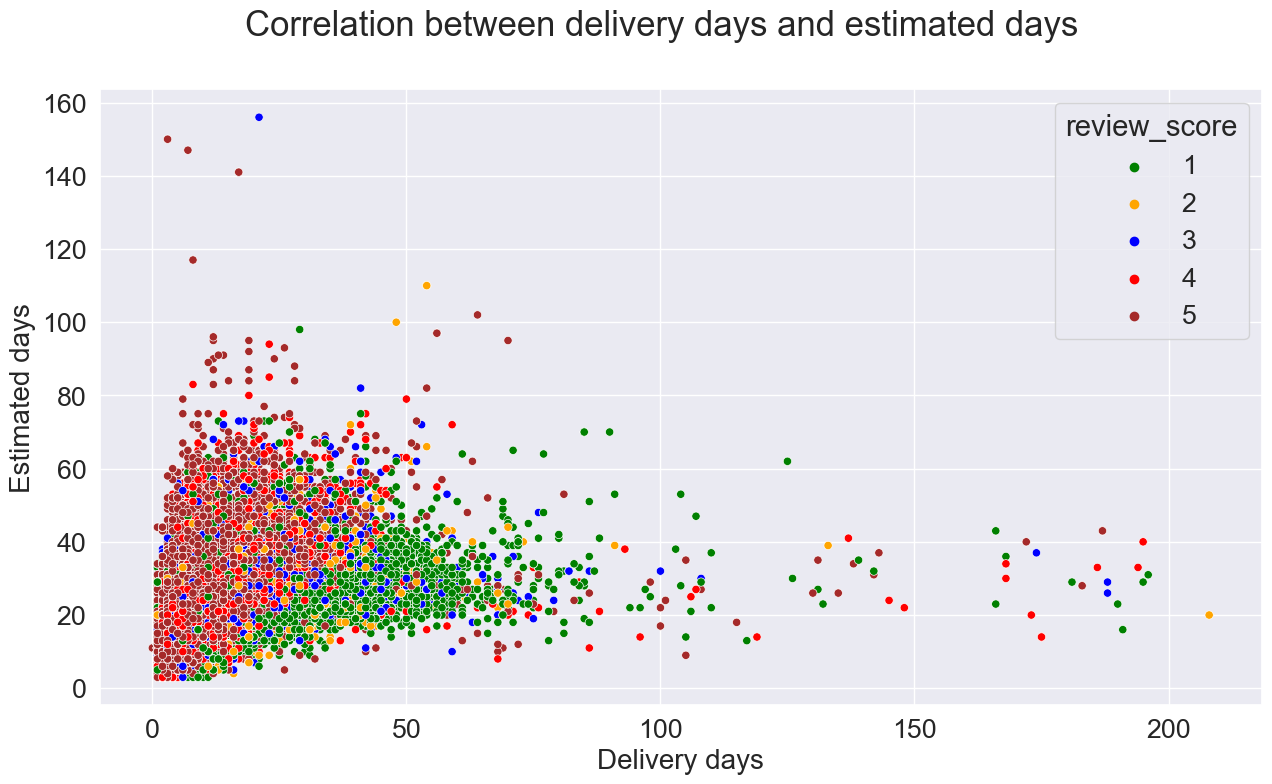

In [35]:
#Set the scatter chart
fig = plt.figure(figsize = (15,8))
ax = plt.axes() 
sns.scatterplot(x="delivery_days", y="estimated_days",
                hue="review_score",sizes=(40, 400),
                palette = ["green","orange","blue","red","brown"],
                data = df_ecommerce, ax = ax)

ax.set_xlabel('Delivery days', fontsize = 20)
ax.set_ylabel('Estimated days', fontsize = 20)

#Set the Suptitle
fig.suptitle('Correlation between delivery days and estimated days', fontsize = 25)

plt.show()

FEATURE ENGINEERING

In [36]:
#Creating new column of arrival time
df_ecommerce['arrival_time'] = (df_ecommerce['estimated_days'] - df_ecommerce['delivery_days'])

#Creating new feature based on the arrival time of each order
delivery_arrival = []
d_arrival = df_ecommerce.arrival_time.values.tolist()

for i in d_arrival:
  if i <= 0:
    delivery_arrival.append('Late')
  else:
    delivery_arrival.append('On time')

df_ecommerce['delivery_arrival'] = delivery_arrival

In [37]:
#Creating new feature based on the review score of each order of good and bad review
df_ecommerce.loc[df_ecommerce['review_score'] < 3 ,'Score'] = 0
df_ecommerce.loc[df_ecommerce['review_score'] > 3,'Score'] = 1

#Removing review with value of 3 because it is a neutral review
df_ecommerce.drop(df_ecommerce[df_ecommerce['review_score'] == 3].index,inplace=True)
df_ecommerce.drop('review_score',axis=1,inplace=True)
print(df_ecommerce.shape)

(103675, 17)


In [38]:
#Label and one hot encoding process
#Handling column with 2 distinct value
df_ecommerce['order_status'] = df_ecommerce['order_status'].replace(['canceled','delivered'],[0,1])
df_ecommerce['delivery_arrival'] = df_ecommerce['delivery_arrival'].replace(['Late','On time'],[0,1])

#Handling column with more than 2 distinct value
one_hot_payment_type = pd.get_dummies(df_ecommerce['payment_type'])
df_ecommerce = df_ecommerce.join(one_hot_payment_type)

#Handling column with more than 10 distinct value
top_10_product_category = [x for x in df_ecommerce.product_category.value_counts().sort_values(ascending=False).head(10).index]

for label in top_10_product_category:
  df_ecommerce[label] = np.where(df_ecommerce['product_category']==label, 1,  0)

In [39]:
#Droping any unimportant column for predicting process
df_ecommerce.drop(['payment_type','product_category'],axis=1,inplace=True)

df_ecommerce.head()

,order_status,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_length,product_description_length,product_photos_qty,delivery_days,...,bed_bath_table,health_beauty,sports_leisure,furniture_decor,computers_accessories,housewares,watches_gifts,telephony,garden_tools,auto
0,1,1,1,18.12,29.99,8.72,40.0,268.0,4.0,8,...,0,0,0,0,0,1,0,0,0,0
1,1,3,1,2.00,29.99,8.72,40.0,268.0,4.0,8,...,0,0,0,0,0,1,0,0,0,0
2,1,2,1,18.59,29.99,8.72,40.0,268.0,4.0,8,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,141.46,118.70,22.76,29.0,178.0,1.0,14,...,0,0,0,0,0,0,0,0,0,0
4,1,1,3,179.12,159.90,19.22,46.0,232.0,1.0,9,...,0,0,0,0,0,0,0,0,0,1


MACHINE LEARNING MODELING

In [40]:
# Split the data
X = df_ecommerce.drop(columns='Score').to_numpy()
y = df_ecommerce[['Score']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

DECISION TREE CLASSIFIER

In [41]:
#Define Decision tree classifier model
dt_clf = DecisionTreeClassifier(random_state=42)

In [42]:
%%time
#Hyperparameter tuning
param = {'max_depth':  [1,2,3,4,5], 'min_samples_split': [5, 10, 100, 300,500,1000]}

#Grid search CV
dt_clf_gridcv = GridSearchCV(dt_clf,param,cv=3,refit=True,return_train_score=True,scoring='accuracy')
dt_clf_gridcv.fit(X_train,y_train)

CPU times: total: 12.2 s
Wall time: 26.3 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [5, 10, 100, 300, 500, 1000]},
             return_train_score=True, scoring='accuracy')

In [43]:
#Results of GridSearchCV
cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 4, 'min_samples_split': 100}",0.871051,1
22,"{'max_depth': 4, 'min_samples_split': 500}",0.870955,2
21,"{'max_depth': 4, 'min_samples_split': 300}",0.870955,2
24,"{'max_depth': 5, 'min_samples_split': 5}",0.870943,4
19,"{'max_depth': 4, 'min_samples_split': 10}",0.870931,5
18,"{'max_depth': 4, 'min_samples_split': 5}",0.870931,5
25,"{'max_depth': 5, 'min_samples_split': 10}",0.870895,7
26,"{'max_depth': 5, 'min_samples_split': 100}",0.870895,8
28,"{'max_depth': 5, 'min_samples_split': 500}",0.870883,9
27,"{'max_depth': 5, 'min_samples_split': 300}",0.870871,10


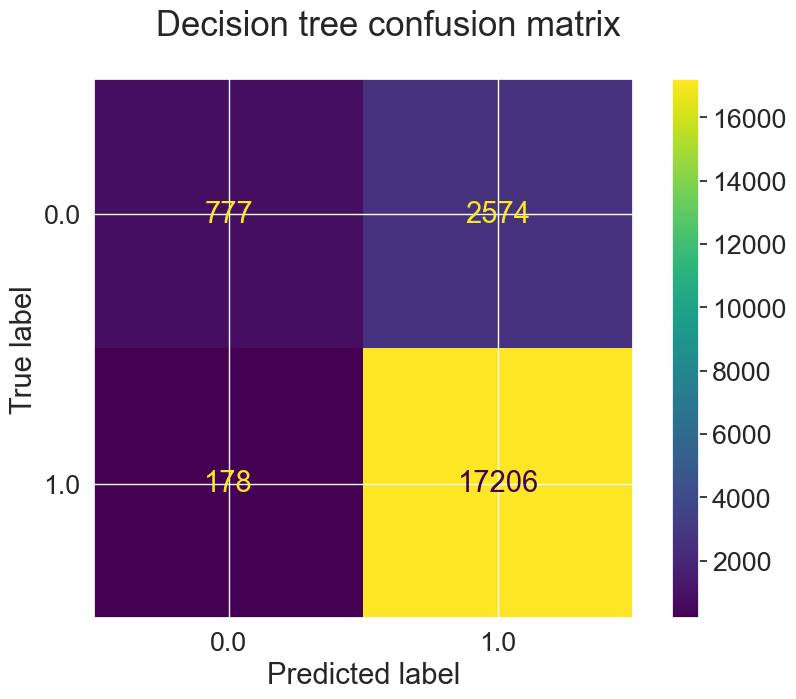

In [44]:
#Create confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale = 1.75)

y_test_pred = dt_clf_gridcv.best_estimator_.predict(X_test)
y_train_pred = dt_clf_gridcv.best_estimator_.predict(X_train)

cm = confusion_matrix(y_test, y_test_pred, labels = dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
fig.suptitle('Decision tree confusion matrix', fontsize = 25)

plt.show()

Random Forest Classifier

In [45]:
#Define random forest classifier model
rf_clf = RandomForestClassifier(random_state=42)

In [46]:
%%time
#Hyperparameter tuning
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

#Grid Search CV
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='accuracy')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: total: 1min 27s
Wall time: 3min 21s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='accuracy')

In [47]:
# results of Grid Search CV
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.869954,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.869894,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.869822,3
18,"{'max_depth': 4, 'n_estimators': 40}",0.869689,4
19,"{'max_depth': 4, 'n_estimators': 50}",0.869677,5
21,"{'max_depth': 5, 'n_estimators': 20}",0.869580,6
20,"{'max_depth': 5, 'n_estimators': 10}",0.869388,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.869291,8
14,"{'max_depth': 3, 'n_estimators': 50}",0.868941,9
13,"{'max_depth': 3, 'n_estimators': 40}",0.868785,10


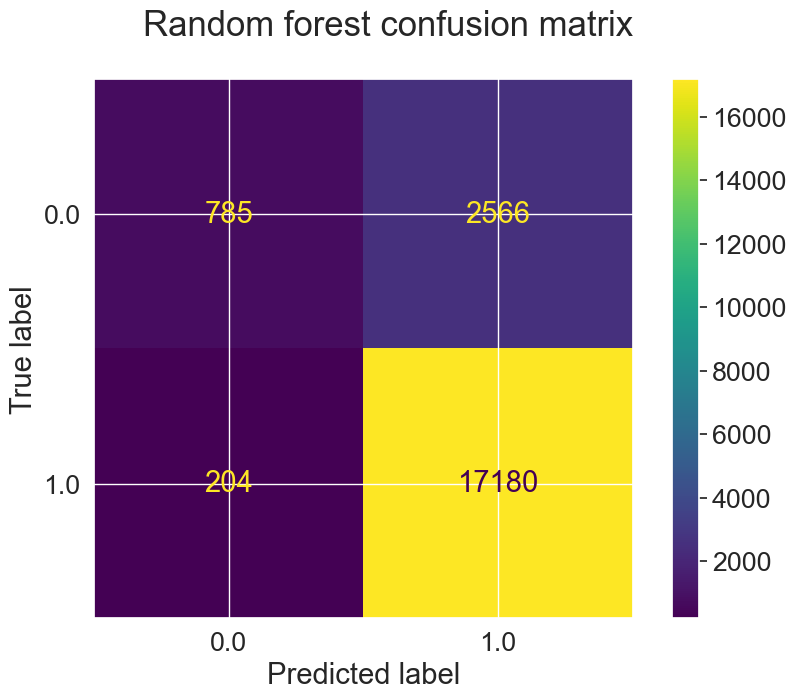

In [48]:
#Create confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_test_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
y_train_pred = rf_clf_gridcv.best_estimator_.predict(X_train)

cm = confusion_matrix(y_test, y_test_pred, labels = rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
fig.suptitle('Random forest confusion matrix', fontsize = 25)
plt.show()

In [49]:
#Comparing actual train data and predicted train data on random forest model
print(f'Random forest model')
print(f'Actual train data')
print(y_train[:100])
print(f'Predicted train data')
print(y_train_pred[:100])

Random forest model
Actual train data
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Predicted train data
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [50]:
#Evaluate random forest model accuracy
accuracy_training = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print(f'Random forest model')
print(f'Accuracy Training Data: {accuracy_training}')
print(f'Accuracy Test Data: {accuracy_test}')

Random forest model
Accuracy Training Data: 0.870122980467808
Accuracy Test Data: 0.8664094526163492


In [51]:
#Classification report on random forest model
print(f'Random Forest Model')
print(classification_report(y_test, y_test_pred))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.79      0.23      0.36      3351
         1.0       0.87      0.99      0.93     17384

    accuracy                           0.87     20735
   macro avg       0.83      0.61      0.64     20735
weighted avg       0.86      0.87      0.83     20735



In [52]:
# define gradient boosting classifier model
gb_clf = GradientBoostingClassifier(random_state=42)

In [53]:
%%time
#Hyperparameter tuning
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

#Grid Search CV
gb_clf_gridcv = GridSearchCV(gb_clf, parameters, cv=5, 
                                     scoring='accuracy')
gb_clf_gridcv.fit(X_train, y_train)

CPU times: total: 8min 4s
Wall time: 18min 6s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='accuracy')

In [54]:
# results of Grid Search CV
cv_result = pd.DataFrame(gb_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.874222,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.873812,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.873330,3
19,"{'max_depth': 4, 'n_estimators': 50}",0.872860,4
18,"{'max_depth': 4, 'n_estimators': 40}",0.872546,5
21,"{'max_depth': 5, 'n_estimators': 20}",0.872052,6
17,"{'max_depth': 4, 'n_estimators': 30}",0.871932,7
16,"{'max_depth': 4, 'n_estimators': 20}",0.871522,8
13,"{'max_depth': 3, 'n_estimators': 40}",0.871449,9
14,"{'max_depth': 3, 'n_estimators': 50}",0.871425,10


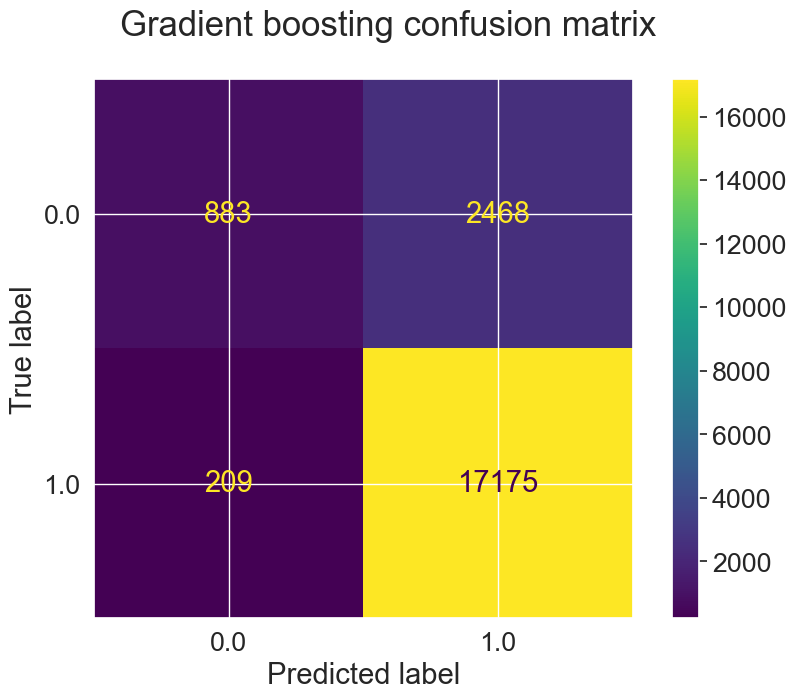

In [55]:
#Create confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_test_pred = gb_clf_gridcv.best_estimator_.predict(X_test)
y_train_pred = gb_clf_gridcv.best_estimator_.predict(X_train)

cm = confusion_matrix(y_test, y_test_pred, labels = gb_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = gb_clf_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
fig.suptitle('Gradient boosting confusion matrix', fontsize = 25)
plt.show()